Available at http://www.comp.nus.edu.sg/~cs3244/1910/03.colab

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/1910/img/banner-1910.png)
---
See **Credits** below for acknowledgements and rights.  For NUS class credit, you'll need to do the corresponding _Assessment_ in [CS3244 in Coursemology](http://coursemology.org/courses/1677) by the respective deadline (as in Coursemology). 

**You must acknowledge that your submitted Assessment is your independent work, see questions in the Assessment at the end.**


**Learning Outcomes for Week 03**

After finishing the in-class exercises and post-class videos, you should be able to:
* Naïve Bayes and $k$-NN
    * Understand Bayes' Rule and its application to Naïve Bayes;
    * Understand distance metrics and its application to $k$ Nearest Neighbors;
    * Implement both Naïve Bayes and $k$ Nearest Neighbors learning algorithms in pseudocode;
    * Know the training and testing times for both of the above algorithms;
* Scaling and Normalization
    * Understand the concept of normalization
    * Explore examples to understand the impact of normalization in training a model
* Basic concepts
    * Understand the concept of Cost Function
    * Using different cost function in different problem
    * Understand concept of Noisy Targets
    


_Welcome to the Week 03 Python notebook._ This week we will start learning algorithms and learn how to apply them.  We introduce **Naïve Bayes** and $k$**-Nearest Neighbors** in the lecture videos, and will be reviewing this material in the second tutorial, which will combine both this week (Week 03) and Week 02's material.  

In this notebook, we will go through different programming exercise in the Pre-tutorial part and some more programming and basic concepts in the Post-tutorial part. In the Pre-tutorial, the programming exercises involve using Naïve Bayes and $k$-NN from SciKit Learn (a cornerstone traditional ML toolkit, or `sklearn`) and we will implement Naïve Bayes from scratch in the later part.

---
# Week 03: Pre-Tutorial Work

* Watch the CS 3244 video playlist for Week 03 Pre.  This will introduce the two ML algorithms for this week's class: _Naïve Bayes_ and $k$ _Nearest Neighbors_.
* After watching the videos, complete the pre-tutorial exercises and questions below.

**Your Turn (Question 1)**: What is the key limitation of the Naïve Bayes classifier?

Choose from: _Slow training time, Needs moderate or large amounts of training data, Classification is often inaccurate, Input features should be conditionally independent_

**Your Turn (Question 2)**: What is the time complexity to train a `k` Nearest Neighbor model? (Recall `m` is the # of training instances, `n` is the # of features per instance.)

Choose from: _O(1), O(ln m), O(m), O(n), O(mn)_

## 1 Programming : $k$-NN and Naïve Bayes from `sklearn`

Let's do some hands on to better understand how to use these algorithms.  Here we have the full version that we would like you execute just to be familiar with typical beginning steps with data science paired with the machine learning portion.  In the pre-video, you'll see the summary section farther down (search for "Summary").  



### .a Loading and Visualizing Input data


We'll use a dataset from the popular [UCI dataset repository](https://archive.ics.uci.edu/ml/index.php); in particular, the [Wine](https://archive.ics.uci.edu/ml/datasets/Wine) dataset.  These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

We'll load in the data for white wines, take a look around and split the data into parts for training the model and testing it.



In [0]:
# Import the standard tools for pythonic data analysis.
import numpy as np 
import pandas as pd 

# Let's read the data in as a "data frame" (df), equivalent to our D = (X,y) data matrix
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';') # Separate on semicolons

We want to predict the quality of the wine from the rest of the features (actually, we can predict any feature from any other feature, there's really no particular distinction between $\mathbf{x}$ and $y$).  Let's take a look at the distribution for **quality**.

 Number of wines of a particular rating:
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d6acfba20>]],
      dtype=object)

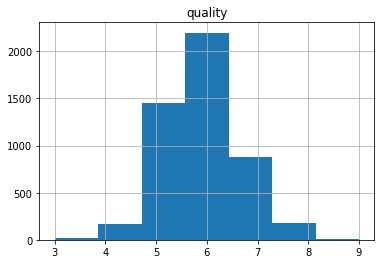

In [0]:
# Get numeric distributions of our quality output
print(" Number of wines of a particular rating:")
counts = df['quality'].value_counts()
print (counts)


# Let's do a histogram plot. To do that we need to specify the 
# y-axis that we want to plot i.e. 'quality', and number of bins
df.hist(column = 'quality', bins = len(counts))

This looks somewhat normally distributed.  Let's say we care about good wines.  Then we'll just concentrate on differentiating great wines from the rest.

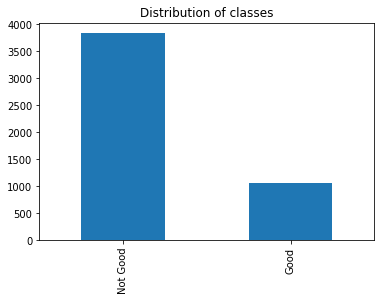

In [0]:
# Create a new column called good wine, where the value of the quality is 8 or better.
df['good wine'] = np.where(df['quality']>=7, "Good", "Not Good")

# Then remove the quality column (why)
df.drop('quality', axis=1, inplace=True)

# Partion the features from the class to predict
df_X = df[df.columns[df.columns != 'good wine']].copy()
df_y = df['good wine'].copy()

df['good wine'].value_counts().plot(kind = 'bar', title = 'Distribution of classes')

### .b Split dataset into train and test

Let's split the data into training and testing data sets before we do anything else.   It's important to look only at the training data to develop our intuitions (**why?**) 

In [0]:
# Learn how to split test and training data from a whole
from sklearn.model_selection import train_test_split

# (random_state): we use a fixed random seed so we get the same results every time.
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test))

Number of training instances:  3918 
Number of test instances:  980


Let's peer at the first few rows of the training portion of the dataset.  Understanding the data is **always** important in trying to build any model for prediction.
You can check against the description of the dataset which is here: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

In [0]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4685,7.2,0.26,0.32,10.4,0.062,23.0,114.0,0.99660,3.23,0.49,10.5
4589,5.4,0.29,0.38,1.2,0.029,31.0,132.0,0.98895,3.28,0.36,12.4
2700,6.5,0.46,0.31,5.0,0.027,15.0,72.0,0.99165,3.26,0.60,11.5
283,6.7,0.34,0.30,15.6,0.054,51.0,196.0,0.99820,3.19,0.49,9.3
1014,6.1,0.16,0.27,12.6,0.064,63.0,162.0,0.99940,3.66,0.43,8.9


We can also take a look at some general statistics.

In [0]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.853714,0.278401,0.332726,6.366807,0.045862,35.352348,138.448698,0.994005,3.187981,0.490439,10.518579
std,0.825378,0.100316,0.119874,4.994107,0.022008,16.885968,42.228313,0.002932,0.150777,0.115614,1.233287
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991700,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.315000,5.200000,0.043000,34.000000,134.000000,0.993715,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.380000,9.800000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,11.800000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000


### .c Correlation between different features

Nothing looks particularly out of place (e.g. no negative values in $pH$). Interestingly, no wines scored below a $3$ or above a $9$ (no perfect $10/10$ scores).  Next, let's check how the features are correlated.

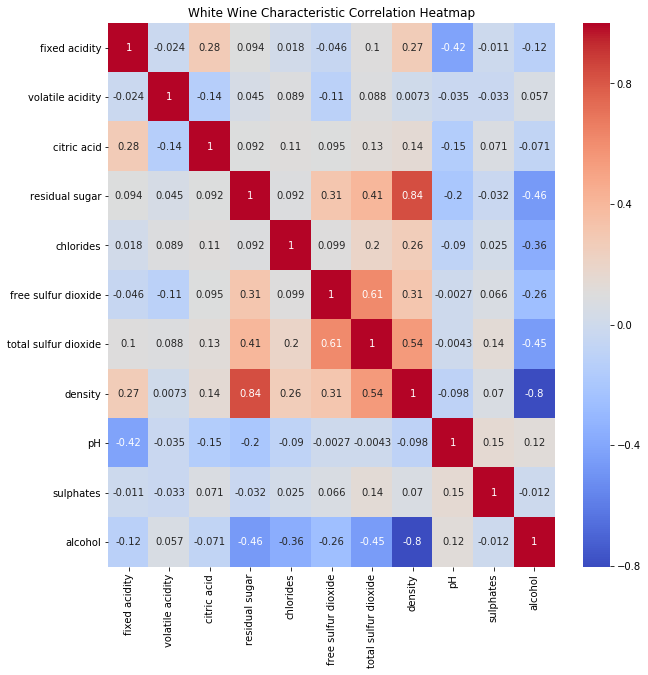

In [0]:
# We'll need a few other libraries to do these exercises
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("White Wine Characteristic Correlation Heatmap")
# Generating a correlation heatmap
corr = X_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, 
           cmap="coolwarm")
plt.show()

Most of these features aren't highly correlated with each other, with particular exceptions of _density_ vs. _residual sugar_ (positive) and _density_ vs. _alcohol_ (negatively correlated).  Good.  

### .d Train and Test the models


Actually all of the above was just preparation.  Let's try fitting the dataset on both Naïve Bayes and $k$ - NN.  




In [0]:
# Get the machine learning algorithm k-NN
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_model = knn.fit(X_train, y_train)
print('NN accuracy for train set: %f' % knn_model.score(X_train, y_train))
print('NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

In [0]:
# Get the machine learning algorithm Naïve Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
print('Naïve Bayes accuracy for train set: %f' % nb_model.score(X_train, y_train))
print('Naïve Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

After running these experiments you should have been able to get about 80% accuracy (on test set) for the nearest neighbor code and about 74% accuracy (on test set) using the Naïve Bayes algorithm.  

### .e Summary



Ok that was a lot to absorb, wasn't it!  But while we wanted to highlight the important parts of ML (get to know your data, and its meaning), we also want you to be clear that the ML relevant part of the code is actually very compact.  Here's the tidy, compact version of the program for Naïve Bayes, which we discussed in the [pre-video](https://www.youtube.com/watch?v=zp_OGNwsXB0) (as a CS3244 student, please watch through Coursemology).

In [0]:
## Do all of the library imports
import numpy as np                                   # General numeric computations
import pandas as pd                                  # Data frame manipulation and cleanup
from sklearn.naive_bayes import GaussianNB           # the NB learner
from sklearn.model_selection import train_test_split # creating splits

## Let's read the data in as a "data frame" (df), equivalent to our (X,Y) data matrix
# This function reads in comma-separated data into a data frame structure. 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';') # Separate on semicolons

## Create the "good wine" column as the y to predict, with quality is 7 or better.
df['good wine'] = np.where(df['quality']>=7, "Good", "Not Good")
df.drop('quality', axis=1, inplace=True) # drop the quality column, else we might accidentally predict with it as a feature...
df_X = df[df.columns[df.columns != 'good wine']].copy() # Partition the features from the class to predict; separate X and y in the data frame
df_y = df['good wine'].copy()

# Split the data into 80% for training and 20% for testing
# (random_state): we use a fixed random seed so we get the same results every time.  20% for testing.
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

# Load the Naïve Bayes algorithm and run it.  Report its accuracy on both training and testing instances.
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
print('Naïve Bayes accuracy for train set: %f' % nb_model.score(X_train, y_train))
print('Naïve Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

Congrats, you've done quite a lot of Machine Learning (calling the `fit` function from `sklearn`)! But that's just machine learning from above the hood, now we will go under the hood and explore more about these two algorithms!


## 2 Programming: Implementing Naïve Bayes

In the previous section, we used the `sklearn` implementation of Naïve Bayes and $k$-NN. Now, we'll be implementing them ourself from scratch. For this,  we'll be using the dataset (that you are already familiar with from the pre-video), named the _Play Golf_ dataset.

### .a Initializing the dataset

In [0]:
import numpy as np
import pandas as pd

# Let's create the Play Golf dataset from scratch
pg_data = np.array([['Rainy','Hot','High','False','No'],
              ['Rainy','Hot','High','True','No'],
              ['Overcast','Hot','High','False','Yes'],
              ['Sunny','Mild','High','False','Yes'],
              ['Sunny','Cool','Normal','False','Yes'],
              ['Sunny','Cool','Normal','True','No'],
              ['Overcast','Cool','Normal','True','Yes'],
              ['Rainy','Mild','High','False','No'],
              ['Rainy','Cool','Normal','False','Yes'],
              ['Sunny','Mild','Normal','False','Yes'],
              ['Rainy','Mild','Normal','True','Yes'],
              ['Overcast','Mild','High','True','Yes'],
              ['Overcast','Hot','Normal','False','Yes'],
              ['Sunny','Mild','High','True','No']])
pg = pd.DataFrame(pg_data)
# add column headers to our data
pg.columns = ["outlook", "temperature", "humidity", "windy","play_golf"]
# Partition the features from the class to predict
pg_X = pg[pg.columns[pg.columns != "play_golf"]].copy()
pg_y = pg["play_golf"].copy()
# check that that worked by printing the first few rows
pg.head()

### .b Naïve Bayes Rule

Recall that in Naïve Bayes, we use Bayes' Rule: $$P(y|\mathbf{x})=\frac{P(\mathbf{x}|y)\times P(y)}{P(\mathbf{x})}$$ and that we make a naïve assumption that all of the features of $\mathbf{x}$ are independent of each other conditional on the class $y$.  We then change the right hand side (RHS) of the rule to: $$P(y|\mathbf{x}) = \frac{(\sum_{i=1}^n P(x_i|y))\times P(y)}{P(\mathbf{x})}$$.  

We need statistics of the prior probability/likelihood $P(y)$ and all of the conditional probabilities/likelihoods for all $n$ features of $x$: $P(x_1|y)$ through $P(x_n|y)$.  We don't need the denominator $P(\mathbf{x})$, the probability/likelihood of the data, because the probabilities/likelihood will affect all outcomes equally.



### .c Calculate Prior Probabilities

Let's go ahead and get the prior probabilities/likelihood of the class labels $P(y)$, where $y \in\{Yes,No\}$.

In [0]:
# Let's calculate the priors.  They should be probabilities between 0 and 1. 
# First calculate the number of rows in the data table.
num_rows = len(pg)

# We'll use a hashtable to store the values of the priors.  Not efficient but simple.

# the dataframe makes it easy to check whether rows or cells meet a condition.
priors = { 'Yes': np.sum(pg['play_golf']=='Yes'),
           'No':  np.sum(pg['play_golf']=='No')}

# Done! Let's check...
print ("Prior probability of 'Play Golf == Yes' = %f" % priors['Yes'])

# Ooo, my bad.  These are counts, not probabilities yet.  
# Your Turn: Can you fix lines 8 and 9?

**Your Turn (Question 3)**: What is the prior probability of 'Play Golf == Yes'?

_Copy the above code block you modified to get the correct answer into the assessment question in Coursemology_

### .d Calculate Conditional Probabilites

Next we are going to calculate our conditional probabilities on each features of $\mathbf{x}$, i.e., $P(x_i|y)$.  
We'll start by counting how many times for the each features of $\mathbf{x}$ occur conditioned on the specific target $y$ value; i.e. out of the total number of days person plays golf, how many of the days were _sunny/rainy/overcast_?

First, let's compile a dictionary of dictionary of possible input values.

In [0]:
# Useful to have a dictionary of all possible values
possible_inputs = {'outlook': {'Rainy', 'Overcast', 'Sunny'}, 
                   'temperature':{'Hot','Mild', 'Cool'},  
                   'humidity': {'High', 'Normal'},
                   'windy' : {'True', 'False'}}

Next, we calculate the probabilities by counting the number of occurences of for each feature's possible input value and each outcome before dividing it by the total occurences of the outcome; e.g.: 
$$ P(\text{sunny}|\text{play golf}) = \frac{\text{number of occurences sunny and play golf}}{\text{number of occurences play golf}} $$ 

In [0]:
# Remember to run the previous cell blocks!
# Let's calculate the conditional probabilities.  They should also be probabilities between 0 and 1.  
# We'll use a hashtable of two hashtables to store the values.
# The first level we'll store the hashes for the output conditions, 
# and in the second level we'll store counts for the input feature values such as such as 'outlook==Rainy'
likelihoods = {'Yes': {}, 'No': {}}
for key in possible_inputs.keys():
    for value in possible_inputs[key]:
        likelihoods['Yes'][key+'=='+value] = len(pg[(pg[key]==value) & (pg['play_golf']=='Yes')])
        likelihoods['No'][key+'=='+value] = len(pg[(pg[key]==value) & (pg['play_golf']=='No')]) 

# Check that our calculation is right
print("Likelihood of it being sunny, given we are playing golf = %.6f" % likelihoods['Yes']['outlook==Sunny'])

# That's not right.  Ah... We forgot to normalise by the probability of the target class.  
# Your Turn: Can you fix the above sets of lines 9, 10 by dividing through by the appropriate amount?    

**Your Turn (Question 4):** What is the likelihood of it being sunny, given we are playing golf (likelihoods['Yes']['outlook==Sunny'])?

_Copy the above code block you modified to get the correct answer into the assessment question in Coursemology_

### .e Calculate the Posterior Probability

Great! We have everything we need.  It's sunny today outside.  What's the posterior probability that we'll go out and play golf? i.e., $P(Yes|outlook=Sunny)$.  Note the difference between the previous likelihood and what we want to calculate now.

In [0]:
print("Posterior* probability we will play golf when it's sunny = %f" % (likelihoods['Yes']['outlook==Sunny'] * priors['Yes']))
print("Posterior* probability we won't play golf when it's sunny = %f" % (likelihoods['No']['outlook==Sunny'] * priors['No']))

The above looks strange doesn't it?  The probabilities don't add up to 1.  If they were really posterior probabilities, they would have to add up.  We put "Posterior$\color{red}{*}$" instead of just "Posterior" to alert you to this.  This is because we didn't actually divide through by the data probabilities, the marginals, as in the slides, as they will affect both outcomes equally.  

So it looks like we'll play golf after all.  

Wait... Now that we've gone outside, I notice that the air is _still_ and that it's _humid_ and the temperature is _hot_.  That's Singapore for you.  What's my "posterior" probability now? 

In [0]:
### Your Turn: fill in the calculations
posterior_yes_SHHF = likelihoods['Yes']['outlook==Sunny'] * likelihoods['Yes']['temperature==Hot'] # complete calculation
posterior_no_SHHF = likelihoods['No']['outlook==Sunny'] * likelihoods['No']['temperature==Hot'] # complete calculation

print("Posterior* probability we will play golf when it's sunny, humid, hot and not windy = %f" % posterior_yes_SHHF)
print("Posterior* probability we won't play golf when it's sunny, humid, hot and not windy = %f" % posterior_no_SHHF)

**Your Turn (Question 5):** Complete the code to calculate the Posterior* probability we will play golf when it's sunny, not windy, humid and hot? Also the probability that we will not play golf?

_Copy the above code block you modified to get the correct answer into the assessment question in Coursemology_

_Aiya!_  Guess I'll stay inside and do some machine learning instead. 😎🍹 

Maybe we can fix the above to calculate actual probabilities for these values.  We'll just have to normalise them against each other.  That's the last part for today.

In [0]:
### Your turn: Calculate the actual probability for our case of playing golf when it's sunny, still, humid and hot.

proba_play_golf = 1.0 # replace with your code

print("Actual posterior probability we will play golf when it's sunny, not windy, humid and hot = %f" % proba_play_golf)

**Your Turn (Question 6)**: Complete the code to calculate the actual probability for our case of playing golf when it's sunny, still, humid and hot.

_Copy the above code block you modified to get the correct answer into the assessment question in Coursemology_


(Optional)  We said that Naïve Bayes can only handle enumerated features and labels: see the summary slide in the Week 03 Pre videos.  Yet, the sklearn Naïve Bayes that we used in the previous exercise handled all of the continuous features.  There's some contradiction here.  Let's pause for a moment and think what could be the difference.  Feel free to look it up on the Web (but then please follow best practice and credit where you found the information in the _References_ part of your Declaration of Individual Work )

**Your Turn (Question 7):** Why is there a discrepancy between the lecture and the pre-tutorial exercise?  What does **sklearn**'s Naïve Bayes do that we didn't?  
**Hint**: Look at the user guide for `sklearn`'s implementation!

---
# Week 03: Post-Tutorial Work


You will have to watch the post-videos on the lecture topics introduced this week, then attempt the following exercises.  

## 3 $k$ Nearest Neighbors

As we discussed in the video $k$ NN doesn't have to do anything to set up the model $h_{\theta}$ for training.  The parameters ${\theta}$  in $k$ NN is actually the _hyperparameter_ choices made for the distance metric and the number of clusters $k$.  

Let's examine the _Iris dataset_ which has samples of iris flowers attributed to $3$ different species of iris.  For simplifiy, we'll study only the first two features, and examine how the decision boundary changes with different values of $k$.

Feel free to look at other features and change the hyperparameter values - the code is provided to you for studying and experimentation.  Tinkering with the algorithms is a key way to learn more about how the algorithms behave and is much more interactive than lecturing, hence we provide this method of self-instruction to you.

In [0]:
# This code is a modification of the sample code for kNN in sklearn
# Modified by Min, Aug 2018.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

iris = datasets.load_iris()

# we only take the first two features. 
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

step_size = .02  # step size in the mesh

plt.figure(figsize=(10,10)) # make a bigger plot for our subplots
for i in range(1,10):
    ## map a subplot i to a certain selection of k
    # Your turn (optional): modify and experiment
    n_neighbors = 4*i - 3 
    plt.subplot(3, 3, i) 
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                       np.arange(y_min, y_max, step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
              edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-NN" % n_neighbors)

plt.tight_layout()
plt.show()

**Your Turn (Question 1):** From the above plot, how many neighbors do you think gives a good result?  Then explain why. (Feel free to try different numbers)

_Replace with your two answers: your answer on one line and your explanation on a following line._

## 4 Scaling and Normalizing Data


Certain machine learning algorithms are sensitive to distance changes, as we have discussed in the post-class video lecture.  Let's see the effect that normalization and scaling has on the wine quality dataset.  Let's first get it set up.

In [0]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

# Let's read the data in as a data frame, equivalent to our (X,Y) data matrix. 
# We'll use another variable even though it's the same data as in our W2 Pre notebook.
wq = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';') # Separate on semicolons

wq['good wine'] = np.where(wq['quality']>=7, "Good", "Not Good")
wq.drop('quality', axis=1, inplace=True) 
wq_X = wq[wq.columns[wq.columns != 'good wine']].copy() 
wq_y = wq['good wine'].copy()
X_train, X_test, y_train, y_test = train_test_split(wq_X, wq_y, test_size=0.2, random_state=0)

Scaling usually is done using min–max scaling, where we take the minimum and maximum values and assign them to 0 and 1, respectively.  Every other value gets mapped in between by a linear transformation.

Often, instead of scaling, we will do normalization, which takes a feature (column) $x_i$ and rescales it so that it's values will have the properties of a standard normal distribution with $\mu=0$ and $\sigma = 1$.  Both of these operations are available in sklearn.  Let's see the effect of normalization has on the wine quality dataset:

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # rescale for \mu = 0 and \sigma = 1, and remember the parameters for the scaling
X_test_scaled = scaler.transform(X_test) # Apply the transform with the **same parameters from training** to the test data.  

In [0]:
fa_mean =        X_train['fixed acidity'].mean()
fa_mean_scaled = X_train_scaled[:,0].mean() # fixed acidity is column 0, when we transformed the data, the output doesn't have column information any more
fa_std =        X_train['fixed acidity'].std()
fa_std_scaled = X_train_scaled[:,0].std() 

va_mean =        X_train['volatile acidity'].mean()
va_mean_scaled = X_train_scaled[:,1].mean() # volatile acidity is column 1, when we transformed the data, the output doesn't have column information any more
va_std =        X_train['volatile acidity'].std()
va_std_scaled = X_train_scaled[:,1].std() 

# check
print ("Fixed Acidity mean and standard deviation: %f (%f)" % (fa_mean,fa_std))
print ("Fixed Acidity (normalized) mean and standard deviation: %f (%f)" % (fa_mean_scaled,fa_std_scaled))

Now that we have two version of our data points, _normalized_ and _unnormalized_, let's plot them and see how do they look!

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# plot both the normalized and unnormalized data in the same plot
plt.figure(figsize=(8,6))
# plot the Unnormalized points in green dots
plt.scatter(X_train['fixed acidity'], X_train['volatile acidity'], color='green', label='Unnormalized', alpha=0.5)
# plot the Normalized points in red dots
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color='red', label='Normalized [$\mu = 0, \sigma = 1$]', alpha=0.3)
# Put labels in the plot
plt.title('Fixed versus Volatile Acidity on the Wine Quality Dataset')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()


As the data points look different, it might affect our algorithm in learning. Let's see how the training is affected by normalization!

In [0]:
# Get the machine learning algorithm
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_model_scaled = knn.fit(X_train_scaled, y_train)
print('1-NN accuracy (Scaled) for test set: %f' % knn_model_scaled.score(X_test_scaled, y_test))
knn_model = knn.fit(X_train, y_train)
print('1-NN accuracy (Non-scaled) for test set: %f' % knn_model.score(X_test, y_test))

**Your Turn (Question 2):** Why do you think scaling helps in this case to improve nearest neighbors algorithm?

_Replace with your answer_

**Your Turn (Question 3):** Do you think scaling always helps? When would you use it?

_Replace with your answer_

## 5 Curse of Dimensionality

(Optional) Finally we include code for you to run and modify to check the _Curse of Dimensionality_.  Recall that the Curse of Dimensionality suggests that the larger the dimensional space you have in your dataset, the more difficult certain aspects of learning can become.

In [0]:
import numpy as np

# Try some on your own
for dim in [1,2,3,4,8,10,100,200]:
    ## choices of |X|
    samples = 200
    #samples = pow(2,dim)
    X = np.random.uniform(size=(samples,dim))

    ## choices of x
    x = np.random.uniform(size=(dim))
    # x = np.zeros(dim)
    print("%d dimensions:" % dim)
    print("#   Generated %d points" % samples)
    # print("#   Test point: ", x)
    dist_array = []
    for j in range(len(X)):
        dist = 0.0
        for i in range(dim):
    #        print ("%f => %f "% (x[i]-X[j][i],pow(x[i]-X[j][i],2)))
            dist += pow(x[i]-X[j][i],2)
    #    print ("Sum distance %f => %f" % (dist,pow(dist,0.5)))
        dist = pow(dist,0.5)
        dist_array.append(dist)
    #    print ("%d th point %s has distance %f" % (j,X[j],dist))
    distances = np.array(dist_array)
    print ("#   Average distance (STD) of test point to %d samples: %f (%f)" % (samples,distances.mean(),distances.std()))

## 6 Cost Functions

### .a Definition


In machine learning, we try to build a model of which we have a target function, $f$ (which we don't know) and we have a hypothesis $h$. We know the output of the target function, how it should be in an ideal situation. And we try to mimic the target function by our hypothesis. We want them to be very close to each other. Now, what does $h \approx f $ mean? We are trying to make our hypothesis as good as the target function. But often times, there will be errors where our hypothesis yields incorrect answers. So we need a cost function to calculate how good our hypothesis is. Alternatively, you can think of it, as a performance measure for our model.

We can define the cost function as $J(h,f)^\color{red}{1}$, which takes as input both the system classification and the actual answers for a dataset (historically this function is denoted as $J()$, to denote the Jacobian or partial derivative, which we'll touch on in Week 04). In most cases, this function is an aggregate over pointwise (i.e., instance-wise) costs $j(h(\mathbf{x}),f(\mathbf{x}))$. Some examples of the pointwise error functions are$^\color{red}{2}$:

* Squared Error: $j(h(\mathbf{x}^{(i)}, f(\mathbf{x}^{(i)})) = (h(\mathbf{x}^{(i)})- f(\mathbf{x}^{(i)}))^2 $

Squared error is useful for regression-related tasks since it tells us how far our model deviates from the actual value.   
* Binary Error: $j(h(\mathbf{x}^{(i)}),f(\mathbf{x}^{(i)})) =
\begin{cases} 
      1 & h(\mathbf{x}^{(i)}) \neq f(\mathbf{x}^{(i)})\\
      0 & h(\mathbf{x}^{(i)}) = f(\mathbf{x}^{(i)})\\
\end{cases}$

The binary error returns 1 or 0 if the hypothesis is not equal or equal, respectively, to its actual target value. For classification purpose, the binary error is more useful. 

* Cross Binary Entropy: Suppose $f(\mathbf{x}^{(i)}) \in \{0,1\}$ and $h(\mathbf{x}^{(i)}) \in [0,1]$ (like a probability function),
$j(h(\mathbf{x}^{(i)}), f(\mathbf{x}^{(i)})) = -(1-f(\mathbf{x}^{(i)}))\log(1-h(\mathbf{x}^{(i)})) - (f(\mathbf{x}^{(i)})\log(h(\mathbf{x}^{(i)})) $ 

This is a generalisation of the binary error and is also used in binary classification tasks. You can think of it as the cost being high when the hypothesis $h(\mathbf{x}^{(i)})$ close to 1 when  $f(\mathbf{x}^{(i)}) = 0$ or  $h(\mathbf{x}^{(i)})$ close to 0 when  $f(\mathbf{x}^{(i)}) = 1$ and vice versa. This will be explored in greater detail in the future.

So, the function $j(h(\mathbf{x}^{(i)}, f(\mathbf{x}^{(i)}))$ calculates a cost for a single point. Now if we want to calculate the overall error, Overall error $J(h,f)$ = average of pointwise errors $j(h(\mathbf{x}^{(i)}),f(\mathbf{x}^{(i)}))$.

Now, training error:
$$J_{train} =\frac{1}{m} \sum_{i=1}^m j(h(\mathbf{x}^{(i)}),f(\mathbf{x}^{(i)})) $$
For training error, we can easily sum up all the pointwise error and calculate the average of the error, and we get the overall error. But it is not the same for the test error. The test error is:
$$J_{test} = \mathbb{E}_{\mathbf{x}}[j(h(\mathbf{x}^{(i)}),f(\mathbf{x}^{(i)}))]$$
So in case of test error we take the expectation of the pointwise error.

_Footnotes_: 

$^\color{red}{1}$: Let's get the jargon.  You'll often also see "cost" termed as "loss" or "risk", and denoted as $L$ (for loss).  These are largely equivalent.  Another term "empirical risk minimization" just means minimizing the cost, as we do here.

$^\color{red}{2}$: We'll use $i$ as the indexing variable in this section, just to avoid confusion with $J$, which denotes the cost function.



### .b Different Cost Functions

Now, the important question which is on your mind must be: "Which cost function should we use?" 

The answer is both simple and complex: "It depends on the problem". 

Let's explore this through two examples. 



**Problem 1**: During your last final examination before graduation, you feel sick.  Are you sick?  Well, you may be sick or you may not (binary classification). If you are sick, you can decide not to attend the exam, and you'll have to graduate the following year instead. If you are not sick, you can attend the exam and graduate, but with possibly a worse class standing since you were feeling unwell when you took the exam. What if our hypothesis makes error? There are two types of errors, _false accept_ and _false reject_. 
<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/error2.png" width=256 />
 </div>

If the system makes a _false accept_, in this context, it means you are not actually sick but declared as sick by the system. Then you will have to spend one more year and pay the tuition fees. If the system makes a _false reject_, i.e. you are sick but you can attend the exam. This may not cause you much trouble as you can go to clinic after the exam. So for this example, the _false accept_ is very costly (one extra whole year of school), so we assign more penalty to false accept than false reject. Below can be a sample cost value for this case.

<div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/error1.png" width=180 />
 </div>


**Problem 2**: Now let's still consider being sick, but with a more virulent sickness.  If the problem was that you have swine fever, then how we measure the cost? It is different now, because a _false reject_ may allow your sickness to spread unchecked, and cause an epidemic.  As such, such _false rejects_ should be given a much higher weight.
 
So, the cost function should be dependent on the problem defined by the user. But this is not always the case.  Most of the time users don't know which error measure is going to be the correct one. So we can compromise in such situations.
 
 * Plausible Measures : These measures are used because we can argue analytically that it has merit. For example, squared error.
 * Convenient Measure : These measures does not have merit, they are used because it is easy to use. For example, closed-form solutions or convex optimization.
 
These are the alternatives, if we do not know the appropriate cost function. Using these measures may help us get a good result quickly. But if we know important aspects of how to embody errors, we should account for these aspects in the design of our cost function.

**Your Turn (Question 4):** As we have discussed two problems, which error we should be worrying more?

Choose from: _False accept, False reject, It depends!_

**Your Turn (Question 5):** From the above question, explain your answer.

_Replace with your answer_

## 7 Noisy Targets


For some cases, the target function we use is not a fuction, i.e. there are multiple output for a single input. How can that be? Let's get back to our credit approval example. We may have two customers with similar attributes, and out of these two customers, one is a good customer (makes money for the bank), and other is a bad customer (loses money for the bank). 

Now, how do we differentiate between these two customers?

To resolve this problem, we use **target distribution** instead of target function. A distribution may have similar values, whereas a function can not. Instead of $ y =f(\mathbf{x})$ we use $P(y|\mathbf{x})$. Now, $(\mathbf{x},y)$ is being generated from the joint distribution $P(\mathbf{x})P(y|\mathbf{x})$. So a noisy target can be defined as:


\begin{align*}
  y = \text{Noisy Target} &= \text{deterministic target function} + \text{noise}\\
  &= f(\mathbf{x}) + \sigma \\ 
\end{align*}

We are trying to learn the deterministic target function, but there is some noise. So we try to pick the pattern (stated above), we can do nothing about the remaining noise, which we assume averages to zero.

So the detrministic target is a special case of a noisy target. We set $P(y|\mathbf{x})$ to be zero except for $y = f(\mathbf{x})$. We put all the probability value to be 1 when $y = f(\mathbf{x})$, and 0 otherwise.
 

**Your Turn (Question 6):** Name an example, which might have _noisy targets_. Try to generalize – Don't reuse our example of credit approval.

_Write 1-4 sentence describing the problem_

---
# Credits


Authored by Lee Yi Quan, Mohammad Neamul Kabir and [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).  Based partially on notebooks from [SarahG](https://www.kaggle.com/sgus1318/wine-quality-exploration-and-analysis/notebook) via Kaggle, [Nishank Kumar Sharma](https://medium.com/click-bait/wine-quality-prediction-using-machine-learning-59c88a826789) via Medium, Iris plot modified from tutorial on sklearn.
Please retain and add to this credits cell if using this material as a whole or in part.   Credits for photos given in their captions.